## **Underfitting y Overfitting**

En este notebook abordaremos un tema esencial dentro de Machine Learning:  el sobreajuste y el subajuste.

### **`Underfitting`**

Generaremos un dataset sintético

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def sample_data(size=100, x_matrix=False, min_x=-2.5, max_x=2.5):
    x = (np.random.random(size=size) - 0.5 ) * (max_x - min_x)
    x.sort() # util para graficar
    y = x ** 2 + x + np.random.normal(0, 1, size=size)
    if x_matrix:
        x = x.reshape((-1,1))
    return x, y

In [3]:
X, y = sample_data(size=100, x_matrix=True)

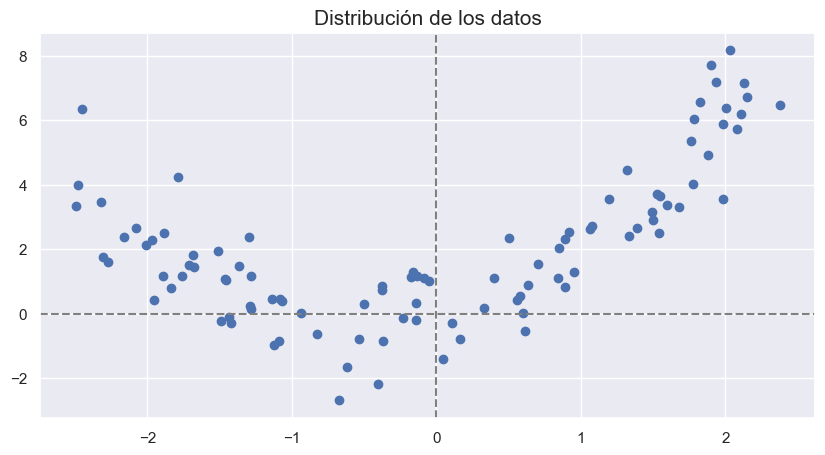

In [4]:
# Graficamos los puntos del dataset

plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.title('Distribución de los datos', fontsize = 15)
plt.axvline(x=0, linestyle="--", color="gray")
plt.axhline(y=0, linestyle="--", color="gray")
plt.show()

Veamos qué pasaría si utilizáramos un modelo de regresión lineal para este tipo de distribución. A priori, ¿pensás que se ajustaría bien a nuestros datos?¿podría abstraerse o generalizar?

In [5]:
from sklearn.linear_model import LinearRegression

reg_lineal = LinearRegression() # Instanciamos nuestra regresión lineal

reg_lineal.fit(X, y) # Entrenamos

LinearRegression()

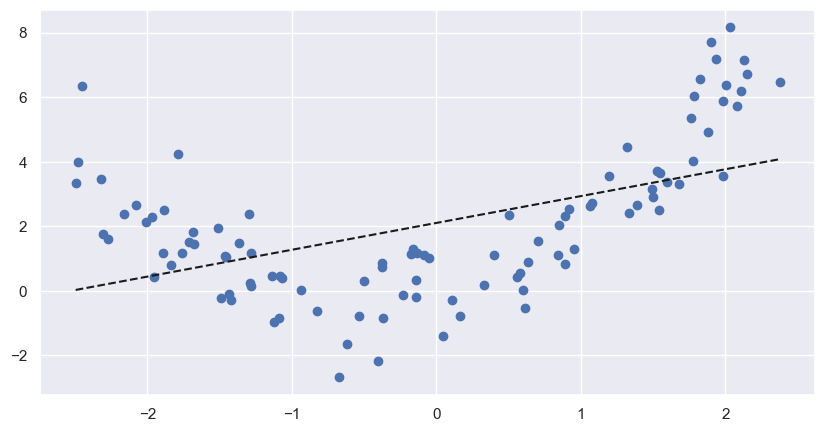

In [6]:
m, M = X.min(), X.max()

plt.figure(figsize=(10,5))
plt.plot([m, M], reg_lineal.predict([[m], [M]]), '--k')
plt.scatter(X, y)
plt.show()

Indudablemente, el **poder de abstracción** de un modelo de regresión lineal, dada una serie de datos que siguen una función cuadrática, es muy bajo. Estamos empleando un modelo muy sencillo, motivo principal de los modelos que presentan underfitting.

Para evitar este tipo de situaciones, podríamos emplear un modelo con un mayor grado de `complejidad`. Por ejemplo, a la regresión lineal le podríamos agregar atributos polinómicos -¡sí, tal como vimos en el punto 3 de la Práctica_01 de la primera clase!-.

________________________________________________________________________________________________________________________________________________________________________________

(75, 2) (25, 2)


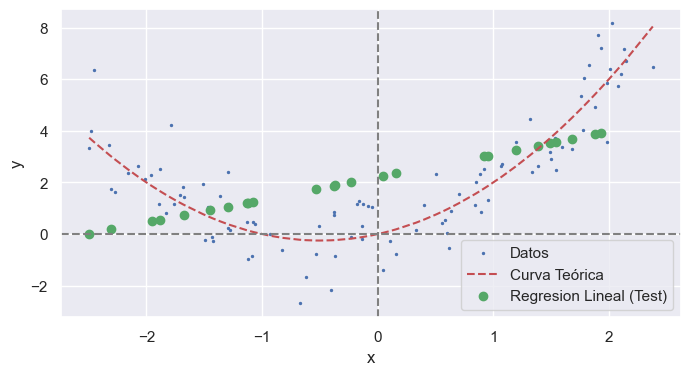

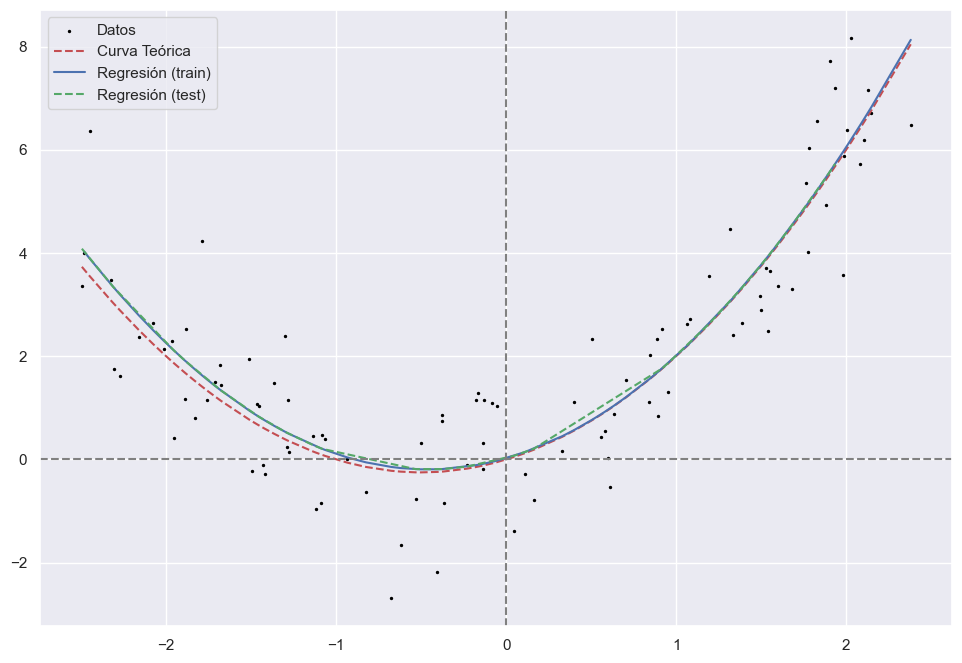

[0.94927091 1.03186548]
0.025591921869458467


In [7]:
# aplicando clase 01
# 1 Dividimos los datos en subset de entrenamiento y testeo para poder aplicar el flujo de trabajo de Scikit-Learn

from sklearn.model_selection import train_test_split

X = X.reshape(-1,1)
"""
La función "reshape" se utiliza para cambiar la forma de una matriz sin cambiar su contenido. 
En este caso, "-1" indica que se debe inferir el tamaño de la primera dimensión de la matriz resultante en función de la longitud de la matriz original. 
Luego, se especifica "1" como tamaño de la segunda dimensión, lo que significa que se debe obtener una matriz de una columna.

Entonces, la variable "X" será una matriz unidimensional (vector columna) que contiene los mismos elementos que la matriz "X1", pero con una forma diferente. 
La dimensión de fila se ajusta automáticamente en función del tamaño de "X1" y la dimensión de columna es 1. 
Este tipo de formato es común en muchas operaciones matemáticas y de aprendizaje automático donde los datos se organizan en forma de columnas.
"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #plit training y test

# Primero instanciaremos un modelo básico de relación lineal para poder compararlo, posteriormente, con una regresión lineal con atributos polinómicos

from sklearn.linear_model import LinearRegression
reg_1 = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento

reg_1.fit(X_train, y_train)


# Predecimos

# y "y_test_pred_1" contendrá las predicciones correspondientes a los datos de prueba.

y_train_pred_1 = reg_1.predict(X_train) # La variable "y_train_pred_1" contendrá las predicciones correspondientes a los datos de entrenamiento = train, 
y_test_pred_1 = reg_1.predict(X_test) # y "y_test_pred_1" contendrá las predicciones correspondientes a los datos de prueba = test.

plt.figure(figsize = (8,4)) # crea la figura size ...
plt.scatter(X, y, s = 2, label = 'Datos') # Grafica todos los valores de X1, habiendolos valuado en la funcion y(x1) para averiguar todos los pares oordenados (x1 ; y(x1).
plt.plot(X,(X ** 2 + X) , '--',label ='Curva Teórica', c = 'r') # Grafica todos los valores de X1, habiendolos valuado en la funcion y_real(X1) = y(X1) + e para averiguar todos los pares ordenados (X1 ; y_real(X1))  
plt.scatter(X_test, y_test_pred_1,label ='Regresion Lineal (Test)', c = 'g') # Gravica todos los valores de x_test (valores de x designados para testeo) en y_test_pred_1
# (funcion predicha de y por el modelo en base al entrenamiento), para encontrar todos los pares ordenados de (x_test ; y_test_pred_1(x_test)) 
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.legend()


from sklearn.preprocessing import PolynomialFeatures # importo libreria polynomial Features

poly = PolynomialFeatures(2, include_bias=False) # ej: 4 potencias quiero reducir (deriva 4 veces. ej, probar cambiando a 1 2 3 y 4 y 5) , sin ruido

#Entrenamos y transformamos los atributos para poder obtener un grado 4

X_train_new = poly.fit_transform(X_train) # nuevo set Xtrain = a partir de la fit_transformacion de X_train
X_test_new = poly.fit_transform(X_test) # nuevo set Xtest = a partir de la fit_transformacion de X_test
print(X_train_new.shape, X_test_new.shape) # shape de ambos

reg_2 = LinearRegression()# Instanciamos un nuevo modelo de regresión lineal, pero ahora tendrá los atributos polinómicos que definimos en la celda anterior

reg_2.fit(X_train_new, y_train) # Entrenamos la regresión con los atributos X polinómicos

y_train_pred_2 = reg_2.predict(X_train_new)# LE ESTA DICIENDO QUE PREDIGA SOBRE LA LINEAR REGRESSION Y LO GUARDE COMO PRED 2
y_test_pred_2 = reg_2.predict(X_test_new)

plt.figure(figsize = (40,8))
plt.subplot(1,3,1)
plt.scatter(X,y, s = 2, label = 'Datos', color = 'black')
plt.plot(X,(X ** 2 + X), '--',label ='Curva Teórica', c = 'r')

list1, list2 = zip(*sorted(zip(X_train_new[:,0], y_train_pred_2)))
plt.plot(list1, list2,label ='Regresión (train)')

list1, list2 = zip(*sorted(zip(X_test_new[:,0], y_test_pred_2)))
plt.plot(list1, list2,label = 'Regresión (test)', c = "g", linestyle = '--')
plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.legend()
plt.show()

print(reg_2.coef_) # imprimo las m de x1 x2 x3 x4 de la ecuacion
print(reg_2.intercept_) # ord al origen.

Fin del recuerdo de practica 01 - clase 1: vemos que pude ajustar el modelo.

________________________________________________________________________________________________________________________________________________________________________

### **`Overfitting`**

Observaremos el sobreajuste en un algoritmo que suele correr ese peligro: el árbol de decisión.

Aquí, tambíen, generaremos un dataset sintético.

In [8]:
from sklearn.datasets import make_classification # clasificador automatico.. importate asi tipo ash ketchp
X, y = make_classification(10000, 100, n_informative=3, n_classes=2, random_state=1982)

In [9]:
X

array([[ 0.94928313, -1.07570638, -0.10573347, ...,  0.50777501,
        -0.84828613, -0.02748477],
       [ 0.18390373,  0.52455354, -1.56135674, ...,  0.75201237,
        -0.07026454,  1.39039424],
       [ 0.49915111, -0.6259499 ,  2.97703727, ..., -0.91725735,
         0.97690872, -1.51897924],
       ...,
       [ 0.32695831,  1.02630943, -0.31216469, ...,  0.37384157,
         1.15170994,  1.2650719 ],
       [ 0.87593629,  0.87939604, -2.01254013, ..., -0.76770484,
        -1.42136963,  0.55373671],
       [-0.19324659,  2.7039551 , -0.5806126 , ..., -2.03512507,
        -0.97038897,  0.09463136]])

In [10]:
y

array([1, 0, 0, ..., 1, 1, 1])

Separamos nuestros datos en un subset de entrenamiento y otro de testeo.

In [11]:
from sklearn.model_selection import train_test_split # importo separador de datos train y testeo.
x_train, x_eval, y_train, y_eval = train_test_split(X, y, test_size=0.35, train_size=0.65, random_state=1982)

Instanciamos nuestro modelo de árbol de decisión, sin establecer un límite de profundidad (**max_depth = None**). De esta manera, el árbol continuará haciendo preguntas hasta que todas las hojas sean puras.

 criterion= este parámetro establece la medida de calidad que se utilizará para evaluar las divisiones en el árbol de decisión. En este caso, se utiliza la entropía ('entropy') como criterio de división.
La entropía se refiere a la impureza de una hoja en términos de la mezcla de clases de muestra. Cuanto mayor sea la entropía, mayor será la impureza.

In [12]:
from sklearn.tree import DecisionTreeClassifier # importo DecisionTreeClassifier

clf = DecisionTreeClassifier (max_depth = None, criterion='entropy') # crea el DecisionTreeClassifier y le atribuye los parametros max depth= None  y criterion= Entropy

Entrenamos

In [13]:
clf.fit(x_train, y_train) # le paso al clacificador el .fit "Ajuste el modelo segun x_train ; y_train"

DecisionTreeClassifier(criterion='entropy')

Evaluamos su *score*

In [14]:
from sklearn.metrics import accuracy_score

print('Precisión en el set de entrenamiento: {0: .2f}'.format(clf.score(x_train, y_train)))
print('Precisión en el set de testeo: {0: .2f}'.format(clf.score(x_eval, y_eval)))

Precisión en el set de entrenamiento:  1.00
Precisión en el set de testeo:  0.93


#### Al dejar crecer el árbol a tal punto que cada hoja sea pura, este cae en el overfitting. Recordemos que el problema de estos modelos sobreajustados es que se **aprenden los datos de memoria**, entonces funcionan mucho mejor en el set de entrenamiento que en el set de testeo.

#### De esta manera, una alternativa para intentar que el modelo generalice mejor y, por lo tanto, tenga más precisión para datos que no ha visto, es tratar de reducir su complejidad por medio del control de la `profundidad` que puede alcanzar el árol.

In [15]:
# Como, al instanciar el modelo, habíamos establecido una profundidad sin límite, 
# comprobamos a cuántos niveles llegó para que todas las hojas sean puras.

print('La cantidad de nodos del modelo clasificador es:' ,clf.tree_.max_depth)

La cantidad de nodos del modelo clasificador es: 22


Siguiendo la teoría, para que el modelo pueda generalizar mejor y, por ende, predecir con mayor precisión en el set de testeo, deberíamos disminuir la profundidad del árbol.

In [16]:
# Instanciamos un nuevo árbol con profundiad de 5 nodos

clf_2 = DecisionTreeClassifier(max_depth=6, criterion='entropy')

In [17]:
# Entrenamos

clf_2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [18]:
# Evaluamos

print('Precisión en el set de entrenamiento: {0: .2f}'.format(clf_2.score(x_train, y_train)))
print('Precisión en el set de testeo: {0: .2f}'.format(clf_2.score(x_eval, y_eval)))

Precisión en el set de entrenamiento:  0.95
Precisión en el set de testeo:  0.94


Podemos corroborrar dos cosas:

+ La precisión del modelo ya no es perfecta en el set de entrenamiento

+ La precisión en el set de entrenamiento es prácticamente igual que en el set de testeo

¿Cuál es el fundamento de esta variación y mejora de nuestro nuevo modelo?

Esta diferencia se debe a que redujimos la complejidad del modelo para intentar ganar en generalización. Esto se conoce comúnmente como `criterio de poda`. Ahora bien, hay que saber hasta qué punto disminuir su complejidad. Si caemos en un modelo demasiado simple, nos iremos al otro extremo: el underfitting.

#### Existe una herramienta para que esto no se tenga que hacer de manera estrictamente manual y saber determinar hasta qué punto *podar el árbol*.

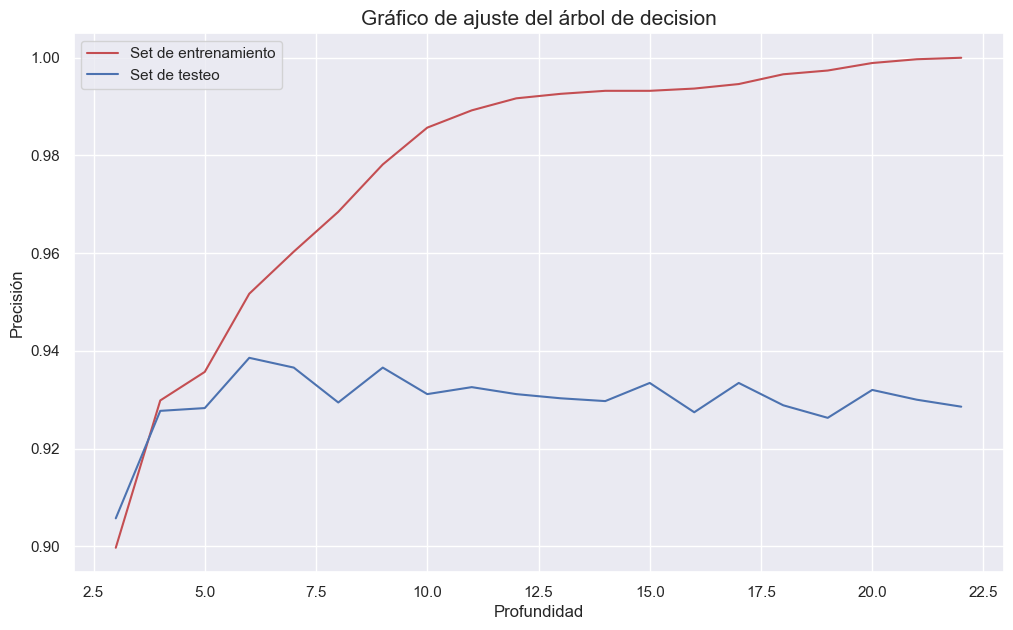

In [19]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 23))

for deep in max_deep_list:
    clf_3 = DecisionTreeClassifier(max_depth=deep, criterion='entropy')
    clf_3.fit(x_train, y_train)
    train_prec.append(clf_3.score(x_train, y_train))
    eval_prec.append(clf_3.score(x_eval, y_eval))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Precisión')
plt.xlabel('Profundidad')
plt.show()

Podemos ver que el punto con mayor precisión, en los datos de evaluación, lo obtenemos con un nivel de profundidad de aproximadamente 6 nodos; a partir de allí, el modelo pierde en generalización y comienza a sobreajustar. 

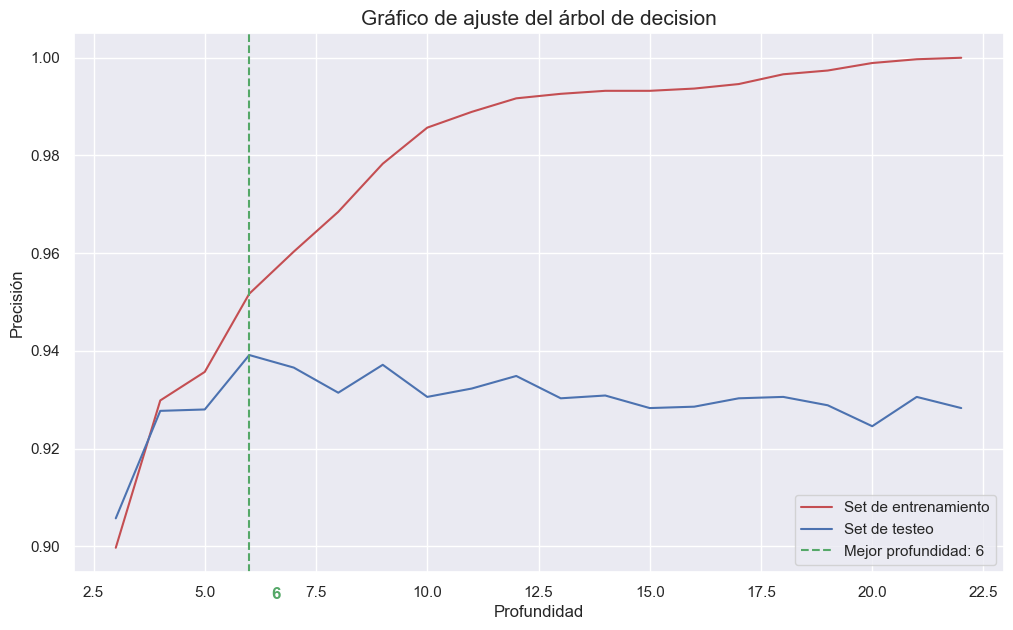

In [26]:
train_prec = []
eval_prec = []
max_deep_list = list(range(3, 23))

best_deep = None # Inicializamos la variable que almacenará la mejor profundidad encontrada
best_eval_prec = 0 # Inicializamos la variable que almacenará la mejor precisión encontrada

for deep in max_deep_list: # Recorremos todas las profundidades del árbol que queremos probar
    clf_3 = DecisionTreeClassifier(max_depth=deep, criterion='entropy') # Creamos el clasificador del árbol con la profundidad actual
    clf_3.fit(x_train, y_train) # Entrenamos el clasificador con los datos de entrenamiento
    train_prec.append(clf_3.score(x_train, y_train)) # Almacenamos la precisión en los datos de entrenamiento
    eval_prec.append(clf_3.score(x_eval, y_eval)) # Almacenamos la precisión en los datos de evaluación
    
    if eval_prec[-1] > best_eval_prec: # Si la precisión en los datos de evaluación es mayor a la mejor precisión encontrada
        best_eval_prec = eval_prec[-1] # Actualizamos la mejor precisión encontrada
        best_deep = deep # Actualizamos la mejor profundidad encontrada

plt.figure(figsize=(12,7)) # Creamos una figura de tamaño 12x7 pulgadas
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento') # Graficamos la precisión en los datos de entrenamiento
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo') # Graficamos la precisión en los datos de evaluación
plt.axvline(x=best_deep, linestyle='--', color='g', label=f'Mejor profundidad: {best_deep}') # Agregamos una línea vertical para indicar la mejor profundidad encontrada
plt.text(best_deep+0.5, best_eval_prec-0.05, f'{best_deep}', fontsize=12, color='g',weight='bold') # Agregamos un texto para indicar la mejor profundidad encontrada
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15) # Agregamos un título al gráfico
plt.legend() # Agregamos una leyenda al gráfico
plt.ylabel('Precisión') # Agregamos una etiqueta al eje y
plt.xlabel('Profundidad') # Agregamos una etiqueta al eje x
plt.show() # Mostramos el gráfico
